 ## This is a pyspark example notebook along with sql
- Supported magics can be found via %%help
- %%markdown: markdown or Select "Markdown" from Cell type dropdown
- %%sql: sql on spark
- %%bash or %%sh: shell
- %%local: Execution in kernel
- %%configure: Can be used to configure Spark settings

### Run spark command
- SparkContext is available as sc
- Spark application is started lazily on the first Spark command run

In [14]:
sc.version

u'2.3.2'

### pyspark Pi Calculation example

In [15]:
from random import random
from operator import add
partitions = 10
n = 100000 * partitions

def f(_):
    x = random() * 2 - 1
    y = random() * 2 - 1
    return 1 if x ** 2 + y ** 2 < 1 else 0

count = sc.parallelize(range(1, n + 1), partitions).map(f).reduce(add)
print("Pi is roughly %f" % (4.0 * count / n))

Pi is roughly 3.138008

### sql example

In [16]:
%%sql
show tables

Output()

In [17]:
# Alternate way to use spark sql
sqlContext.sql("show tables").collect()

[Row(database=u'default', tableName=u'default_qubole_airline_origin_destination', isTemporary=False), Row(database=u'default', tableName=u'default_qubole_memetracker', isTemporary=False), Row(database=u'default', tableName=u'salesdata', isTemporary=False)]

In [18]:
%%sql
select * from default_qubole_memetracker limit 10

Output()

### Visualizations on airline data for four quarters

In [19]:
%%sql
select origin, quarter, count(*)/1000000 count from default_qubole_airline_origin_destination
  where quarter is not NULL group by origin, quarter order by count desc limit 100


Output()

### Matplotlib example using store and local magic
- The -o parameter stores the data in the specified variable in the kernel
- The number of rows to be retrived can be specified using -n parameter

In [20]:
%%sql -o data -n 10 -q
select * from default_qubole_airline_origin_destination

### Matplotlib can be used alongwith %%local to plot stored data

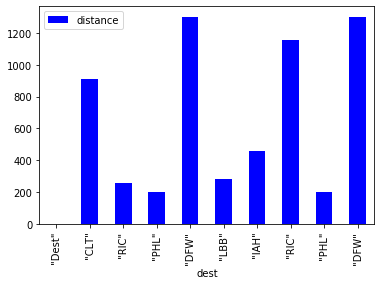

In [21]:
%%local
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

data['distance'] = pd.to_numeric(data['distance'], errors='coerce')
data.plot(kind='bar', x='dest', y='distance', color='blue')

plt.show()

### Matplotlib example using matplot line magic

In [22]:
import matplotlib.pyplot as plt
plt.switch_backend('agg')
import pandas as pd

plt.figure(num=None, figsize=(10, 10), dpi=100)

df = pd.read_csv("https://raw.githubusercontent.com/arangodb/example-datasets/master/Cities/GeoLiteCity.csv")

col1 = df['longitude']
col2 = df['latitude']
plt.scatter(col1, col2, edgecolors='r')

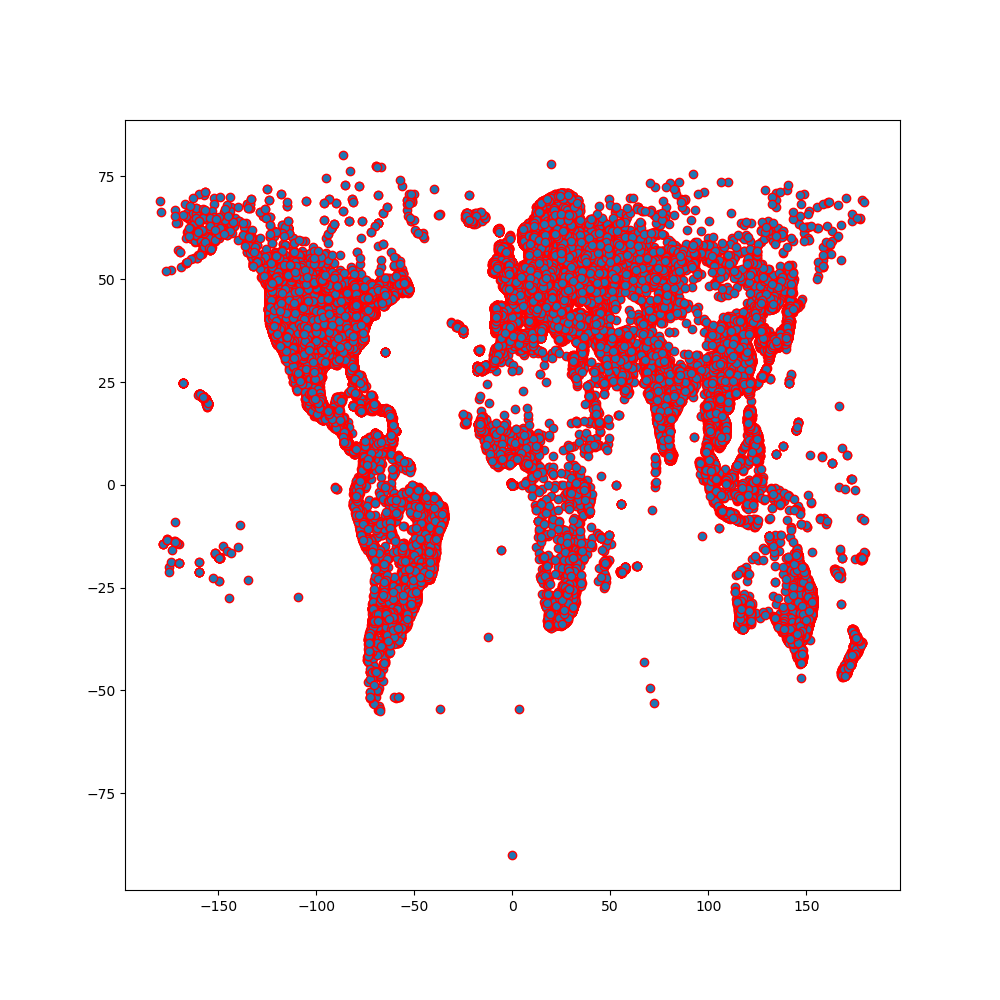

In [23]:
%matplot plt

### Transferring data from spark to local kernel

A dataframe can also be transferred from a non %%sql cell to %%local cell using the %spark line magic. An example is shown below.

In [24]:
import pandas as pd
pdf = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/1962_2006_walmart_store_openings.csv")
sdf = spark.createDataFrame(pdf.astype(str))

In [25]:
%spark -o sdf

In [ ]:
%%local
%matplotlib inline
sdf.groupby('YEAR').count()['storenum'].plot.line()